In [1]:
import pandas as pd
vendas_df = pd.read_csv(r'Arquivos/Contoso - Vendas - 2017.csv',sep=';')
produtos_df = pd.read_csv(r'Arquivos/Contoso - Cadastro Produtos.csv',sep=';')
clientes_df = pd.read_csv(r'Arquivos/Contoso - Clientes.csv',sep=';')
lojas_df = pd.read_csv(r'Arquivos/Contoso - Lojas.csv',sep=';')

clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.rename(columns = {'E-mail':'E-mail do Cliente'})

display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64

<AxesSubplot:>

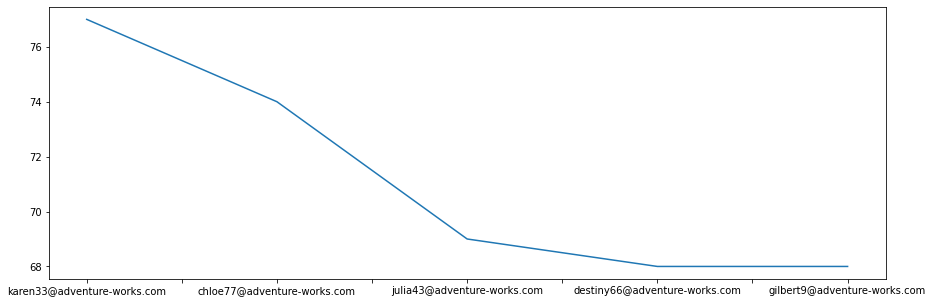

In [5]:
frequencia_cliente = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_cliente)
frequencia_cliente[:5].plot(figsize=(15,5))

In [2]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<AxesSubplot:xlabel='Nome da Loja'>

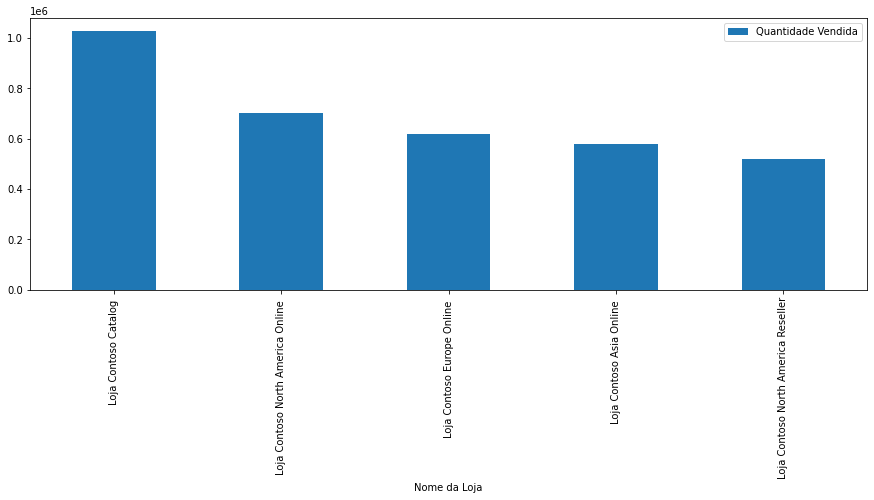

In [3]:
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida',ascending=False)
display(vendas_lojas)
vendas_lojas[:5].plot(figsize=(15,5),kind='bar')

In [25]:
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)


Loja Contoso Catalog  1029117


In [26]:
vendas_lojas[-1:]

,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


In [4]:
qtd_vendida = vendas_df['Quantidade Vendida'].sum()
qtd_devolvida = vendas_df['Quantidade Devolvida'].sum()
print('{:.2%}'.format(qtd_devolvida/qtd_vendida))

1.17%


In [32]:
vendas_europeonline = vendas_df[vendas_df['ID Loja'] == 306]
display(vendas_europeonline)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


In [7]:
#junto
dfloja306semdev = vendas_df[(vendas_df['ID Loja']== 306) & (vendas_df['Quantidade Devolvida'] == 0)]
display(dfloja306semdev)
#separado
loja_306 = vendas_df['ID Loja']  == 306
devolvidas = vendas_df['Quantidade Devolvida'] == 0
df2_306semdev = vendas_df[loja_306 & devolvidas]
display(df2_306semdev)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com
